In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#read data into data frame
date = pd.read_csv("date.csv")
patient = pd.read_csv("patient_info.csv")




In [2]:
# 1.1. The missing value from BMI can be replaced with the mean value of its regarding gender


#as a test, print all patients where BMI is NaN
print("Before:")
display(patient["BMI"][patient["BMI"].isna()])

#calculate mean by gender
female = patient.loc[patient["Sex"]=="Female"]
male = patient.loc[patient["Sex"]=="Male"]

meanBmiM = male["BMI"].mean();
meanBmiF = female["BMI"].mean();

#replace with mean
for x in patient.index:
    if pd.isna(patient.loc[x, "BMI"]):
        if (patient.loc[x, "Sex"]=="Female"):
            patient.loc[x, "BMI"] = meanBmiF
        else:
            patient.loc[x, "BMI"] = meanBmiM


#check if there is any NaN BMI data left
print("After:")
display(patient["BMI"][patient["BMI"].isna()])




Before:


93     NaN
263    NaN
369    NaN
803    NaN
828    NaN
958    NaN
1001   NaN
1052   NaN
1055   NaN
1060   NaN
1069   NaN
1141   NaN
1262   NaN
1356   NaN
1442   NaN
1793   NaN
1967   NaN
2132   NaN
2191   NaN
Name: BMI, dtype: float64

After:


Series([], Name: BMI, dtype: float64)

In [3]:
#1.2. Do the sanity check for all the columns in 2 files, and remove the sample which does not pass the sanity check

#PATIENT
print("Before checks ", patient.size)

#Sanity check for ID (must be 7 digits)
patient = patient[patient['Participant_ID'] >= 1000000]
print("After ID check :", patient.size)

#Sanity check for sex (must be "Male" or "Female")
patient = patient[patient["Sex"].isin(['Male', "Female"])]
print("After sex check: ", patient.size)

#Sanity check for age (can't be below 40)
patient = patient[patient['Age'] >= 40]
print("After age check: ", patient.size)

#Sanity check for Smoking Status (must be "Never", "Previous", "Current", "Prefer not to answer")
allowedSmokingStatus = ["Never", "Previous", "Current", "Prefer not to answer"]
patient = patient[patient["Smoking_status"].isin(allowedSmokingStatus)]
print("After Smoking check: ", patient.size)

#Sanity check for BMI (must be between 15 and 60)
patient = patient[patient['BMI'] >= 15]
patient = patient[patient['BMI'] <= 60]
print("After BMI check: ",patient.size)

#Sanity check for Disease (must be 1 or 2)
patient = patient[patient['Disease'].isin([1, 2])]
print("After disease check: ", patient.size)









Before checks  13308
After ID check : 13308
After sex check:  13308
After age check:  13302
After Smoking check:  13284
After BMI check:  13272
After disease check:  13272


In [4]:
#DATE
print("Before checks", date.size)

#Sanity check for ID (must be 7 digits)
date = date[date['Participant_ID'] >= 1000000]
print("After ID check :", date.size)

#Sanity check for VisitDate (must be after 1950-01-01 but before 2023-12-31)
date['VisitDate'] = pd.to_datetime(date['VisitDate'], format='%d/%m/%Y')

date = date[date["VisitDate"].isin(pd.date_range("1950-01-01", "2023-12-31"))]

print("After date check :", date.size)

Before checks

 5782
After ID check : 5782
After date check : 5610


In [5]:
# 1.3. Calculate the number of visits of each patient, if the VisitDate is missing, means they don't visit the hospital during that period

#count occurence of id in date, means get number of hospital visits for each id
Number_of_visit =  date.groupby("Participant_ID").count()
display(Number_of_visit.head(10))


,VisitDate
Participant_ID,
1003300,2
1004025,1
1005551,2
1005594,1
1005624,2
1008540,1
1008931,2
1010012,1
1010841,2


In [6]:
# 1.4. Merge two files with columns: Patient_ID, Sex, Age, BMI, Smoking_status, Number_of_visit, Disease

# make a new dataframe from patient and number of visits
# right means, if a patient does not have a hopital visit it is NaN
df= pd.merge(Number_of_visit, patient, on="Participant_ID", how="right")


# replace NaN with 0
df["VisitDate"].fillna(0, inplace = True)

# rename columns
df = df.rename(columns={'Participant_ID': 'Patient_ID', 'VisitDate': 'Number_of_visit'})

#reorder columns
df = df[["Patient_ID", "Sex", "Age", "BMI", "Smoking_status", "Number_of_visit", "Disease"]]
display(df.head(30))



,Patient_ID,Sex,Age,BMI,Smoking_status,Number_of_visit,Disease
0,1003300,Male,62,33.7597,Previous,2.0,2
1,1004025,Male,60,28.1173,Previous,1.0,1
2,1005551,Male,69,26.4159,Previous,2.0,2
3,1005594,Male,64,24.7550,Previous,1.0,1
4,1005624,Male,64,35.0773,Previous,2.0,2
5,1008540,Female,64,21.6764,Previous,1.0,2
6,1008931,Male,62,26.9529,Previous,2.0,2
7,1010012,Male,66,33.8126,Never,1.0,2
8,1010841,Male,58,30.0826,Previous,2.0,1
9,1015236,Male,63,23.8804,Previous,1.0,2


MEAN
Sick 29.041335734795698
Healthy 29.087936257262704
MEDIAN
Sick 28.3642
Healthy 28.1667
DESCRIBE (helthy, sick)


count    565.000000
mean      29.041336
std        5.118812
min       16.003700
25%       25.601500
50%       28.364200
75%       32.100100
max       53.485700
Name: BMI, dtype: float64

count    1647.000000
mean       29.087936
std         5.214853
min        16.099500
25%        25.522500
50%        28.166700
75%        31.882100
max        58.946800
Name: BMI, dtype: float64

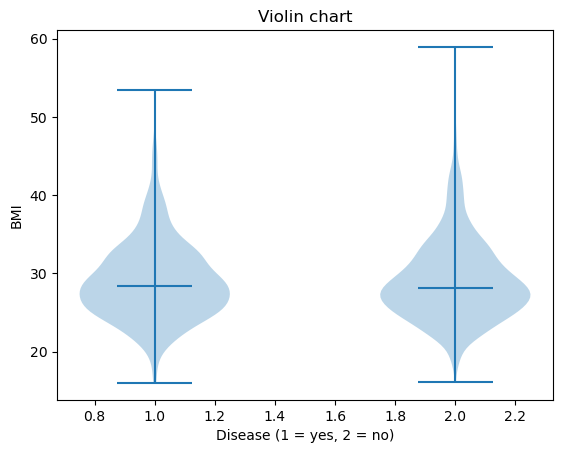

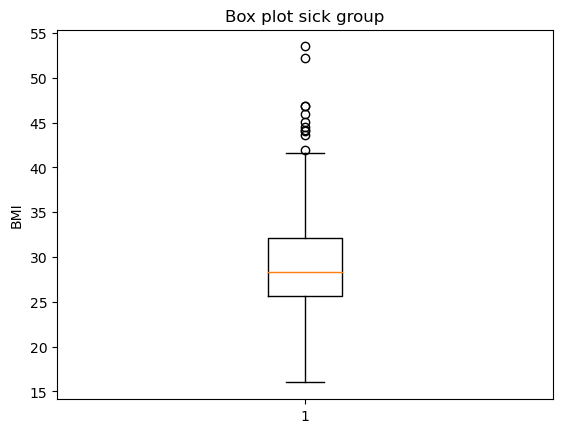

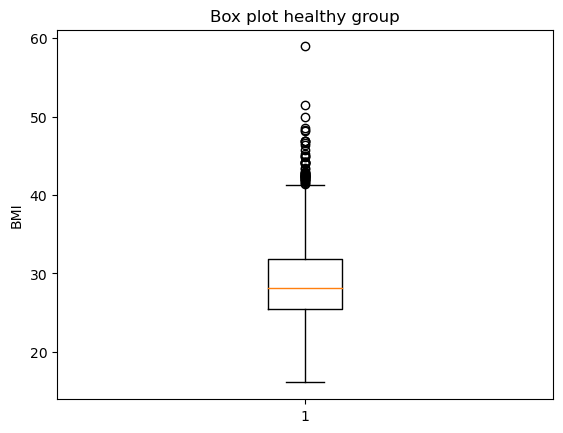

In [12]:
# 2.1. Is the BMI different between the healthy and control group? make the box/violin chart
df_sick = df[df["Disease"] == 1]
df_healthy = df[df["Disease"] == 2]

print("MEAN")
print("Sick", df_sick["BMI"].mean())
print("Healthy", df_healthy["BMI"].mean())

print("MEDIAN")
print("Sick", df_sick["BMI"].median())
print("Healthy", df_healthy["BMI"].median())

print("DESCRIBE")
display("Sick", df_sick["BMI"].describe())
display("Healthy", df_healthy["BMI"].describe())

#Violin Chart
groupedByHealth = df.groupby("Disease")["BMI"].apply(list)
plt.violinplot(groupedByHealth, showmedians=True)
plt.title("Violin chart")
plt.xlabel('Disease (1 = yes, 2 = no)')
plt.ylabel('BMI')

plt.show()


#Box plots
plt.title("Box plot sick group")
plt.boxplot(df_sick["BMI"])
plt.ylabel('BMI')

plt.show()

plt.title("Box plot healthy group")
plt.boxplot(df_healthy["BMI"])
plt.ylabel('BMI')

plt.show()


#Between healthy and sick patients the mean BMI (29.04 vs  29.09) as well as Median BMI (28.3642 vs 28.1667) are very similar. Even the distribution is very similar, the only significant difference is that in the healthy group, the max BMI was at 58.9 vs 53.49 for the sick group)  

In [28]:
# 2.2. Is the proportion of Smoke status different between the healthy and control group?

#calucate the total of each status 
total = df["Smoking_status"].value_counts()
print("Smoking status in both groups together")
print(total)

#Smoking status grouped by healthy
grouped_df = df.groupby('Disease')['Smoking_status'].value_counts()
display(grouped_df)

#Calculate percentages for smoking status in sick group
healthy_percentages = (grouped_df[2] / grouped_df[2].sum()) * 100
print("HEALTHY")
display(healthy_percentages)

sick_percentages =(grouped_df[1] / grouped_df[1].sum()) * 100
print("SICK")
display(sick_percentages)

#The porportion of smoking status between the sick and healthy groups is only slightly different. The sick group only has a slightly higher percentage of current smokers (16.28%) than the healthy group (15.66%). The percentage of previous smokers is also pretty similar, healthy = 45.53%, sick = 44.96%. Therefore the percentage of patients who never smoked is similar too.  


Smoking status in both groups together
Previous                1004
Never                    849
Current                  350
Prefer not to answer       9
Name: Smoking_status, dtype: int64


Disease  Smoking_status      
1        Previous                254
         Never                   214
         Current                  92
         Prefer not to answer      5
2        Previous                750
         Never                   635
         Current                 258
         Prefer not to answer      4
Name: Smoking_status, dtype: int64

HEALTHY


Smoking_status
Previous                45.537341
Never                   38.554948
Current                 15.664845
Prefer not to answer     0.242866
Name: Smoking_status, dtype: float64

SICK


Smoking_status
Previous                44.955752
Never                   37.876106
Current                 16.283186
Prefer not to answer     0.884956
Name: Smoking_status, dtype: float64

In [68]:
# 2.3. Is the smoke status related to the number of Hospital visits regardless of the disease? (ignore the "Prefer not to answer")
currentSmokers = df[df["Smoking_status"] == "Current"]
previousSmokers = df[df["Smoking_status"] == "Previous"]
neverSmokers = df[df["Smoking_status"] == "Never"]

print("Current: ", currentSmokers["Number_of_visit"].mean(), "| Previous: ", previousSmokers["Number_of_visit"].mean(),"| Never: ", neverSmokers["Number_of_visit"].mean() )

#The average number of hospital visits for people who currently smoke is slightly higher (1.3) than that of people who have previously smoked (1.26). The people who have never smoked have a slightly lower visit average (1.25)

Current:  1.3 | Previous:  1.2659362549800797 | Never:  1.2508833922261484


In [64]:
# 2.4. Is the number of visits higher in the Disease group than in the Healthy group?


totalVisits = df["Number_of_visit"].sum()

sickVisits = df_sick["Number_of_visit"].sum()
healthyVisits = df_healthy["Number_of_visit"].sum()


print(totalVisits, sickVisits, healthyVisits)

#No, the healthy group went to the hopital a total of 2082 times while the sick group went 718 times.



2800.0 718.0 2082.0
2800.0


'\'\'\ngrouped_visits_disease = df.groupby("Number_of_visit")["Disease"].value_counts()\ndisplay(grouped_visits_disease)\nprint("SICK", grouped_visits_disease[1].mean())\nprint("HEALTHY", grouped_visits_disease[2].mean())\n\n\nsick_per = (grouped_visits_disease[1] / grouped_visits_disease[1].sum()) * 100\nprint("HEALTHY:")\ndisplay(sick_per)\nhealthy_per = (grouped_visits_disease[2] / grouped_visits_disease[2].sum()) * 100\nprint("HEALTHY:")\ndisplay(healthy_per)\n'

In [34]:
#2.5. Do Male has a higher current smoke percentage compared to Female?
grouped_sex_smoke = df.groupby('Sex')['Smoking_status'].value_counts()
female_percentages = (grouped_sex_smoke["Female"] / grouped_sex_smoke["Female"].sum()) * 100
male_percentages = (grouped_sex_smoke["Male"] / grouped_sex_smoke["Male"].sum()) * 100

display(male_percentages, female_percentages)
# No, males have a current smoke percentage of 15.48% while females are at 16,67%


Smoking_status
Previous                48.857868
Never                   35.152284
Current                 15.482234
Prefer not to answer     0.507614
Name: Smoking_status, dtype: float64

Smoking_status
Never                   46.383648
Previous                36.792453
Current                 16.666667
Prefer not to answer     0.157233
Name: Smoking_status, dtype: float64